In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import ticker

# Introduction

This goal of this project is to analyze biodiversity data from the National Parks Service, particularly around various species observed in different national park locations.

This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.

Here are a few questions that this project has sought to answer:

- what is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?


Data sources:

Both Observations.csv and Species_info.csv was provided by Codecademy.com.

Note: The data for this project is inspired by real data, but is mostly fictional.

# Load Data Frames into Pandas

In [2]:
obs_df = pd.read_csv('observations.csv')
species_df = pd.read_csv('species_info.csv')

In [3]:
print(obs_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None


# Data Frame Inspection

Here we see that there are a number of null objects within the convservation_status column. Looking at the csv file, we see that any null cell indicatest that they are "not endangered". Change non-null cells to "not-endangered" category"

In [4]:
print(species_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None


## Categorizing null values as "Not Endangered"

In [5]:
species_df = species_df.fillna("Not_Endangered" )

In [6]:
print(species_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  5824 non-null   object
dtypes: object(4)
memory usage: 182.1+ KB
None


## Species Data Frame Inspection

In [7]:
print(species_df.describe())

              category    scientific_name        common_names  \
count             5824               5824                5824   
unique               7               5541                5504   
top     Vascular Plant  Castor canadensis  Brachythecium Moss   
freq              4470                  3                   7   

       conservation_status  
count                 5824  
unique                   5  
top         Not_Endangered  
freq                  5633  


In [8]:
species_df.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Not_Endangered
1,Mammal,Bos bison,"American Bison, Bison",Not_Endangered
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Not_Endangered
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",Not_Endangered
4,Mammal,Cervus elaphus,Wapiti Or Elk,Not_Endangered


In [9]:
species_list = np.array(species_df.category.unique())
species_list

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

We see there are 5 distinctconservation categories with 15 total endangered species, and 151 of concern.

In [10]:
conservation_status = np.array(species_df.conservation_status.unique())
conservation_status

array(['Not_Endangered', 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

In [11]:
print(species_df.groupby("conservation_status").size())

conservation_status
Endangered              16
In Recovery              4
Not_Endangered        5633
Species of Concern     161
Threatened              10
dtype: int64


### Checking for duplicate rows

Upon data inspection, it was observed that there were some duplicate values within the "scientific name" column because they had multiple common names. We will need to remove duplicate values before continuing our investigation.

In [12]:
species_df.iloc[:,1].duplicated().value_counts()

False    5541
True      283
Name: scientific_name, dtype: int64

In [13]:
species_df = species_df.drop_duplicates(subset = ['scientific_name'])

In [14]:
print(species_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5541 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5541 non-null   object
 1   scientific_name      5541 non-null   object
 2   common_names         5541 non-null   object
 3   conservation_status  5541 non-null   object
dtypes: object(4)
memory usage: 216.4+ KB
None


## Observations Data Frame Inpsection

In [15]:
print(obs_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None


Describing the observation data frame below does not tell us much. However, looking at the csv file, it will be useful to know the unique parks that are in the data set.

In [16]:
print(obs_df.describe())

       observations
count  23296.000000
mean     142.287904
std       69.890532
min        9.000000
25%       86.000000
50%      124.000000
75%      195.000000
max      321.000000


In [17]:
obs_df.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [18]:
park_list = np.array(obs_df.park_name.unique())
park_list

array(['Great Smoky Mountains National Park', 'Yosemite National Park',
       'Bryce National Park', 'Yellowstone National Park'], dtype=object)

## Merging observation and species data frame 

In [19]:
comb_df = pd.merge(obs_df, species_df, how = 'left', on = 'scientific_name' )

In [20]:
comb_df.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Not_Endangered
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,Not_Endangered
2,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Klamath Plum,Not_Endangered
3,Abutilon theophrasti,Bryce National Park,84,Vascular Plant,Velvetleaf,Not_Endangered
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant,Common Bluecup,Not_Endangered


In [21]:
comb_df.shape

(23296, 6)

In [22]:
comb_df.to_csv(r'C:\Users\sjauy\Python\Code_Academy_Projects\Biodiversity_Capstone\biodiv_env\csv_results\merge_df.csv',index=False,header = True)

In [23]:
pivot_comb_df = pd.pivot_table(comb_df, index = ['category', 'conservation_status'], values = ['observations'], \
                        aggfunc = np.sum)

In [24]:
pivot_comb_df

observations
category          conservation_status              
Amphibian         Endangered                    144
                  Not_Endangered              41219
                  Species of Concern           2044
                  Threatened                    564
Bird              Endangered                    574
                  In Recovery                  1392
                  Not_Endangered             254225
                  Species of Concern          36642
Fish              Endangered                    455
                  Not_Endangered              67422
                  Species of Concern           2109
                  Threatened                    832
Mammal            Endangered                   1463
                  Not_Endangered             100247
                  Species of Concern          14408
                  Threatened                    578
Nonvascular Plant Not_Endangered             187948
                  Species of Concern           2705
Reptile           Not_Endangered              42142
                  Species of Concern           2536
Vascular Plant    Endangered                    162
                  Not_Endangered            2532241
                  Species of Concern          22135
                  Threatened                    552

In [25]:
comb_df = comb_df[comb_df.conservation_status != 'Not_Endangered']

In [26]:
pivot_comb_df = pd.pivot_table(comb_df, index = ['category'],\
                              columns = ['conservation_status'],\
                              values = ['observations'],\
                             aggfunc = np.sum)

In [27]:
pivot_comb_df

observations                                          
conservation_status   Endangered In Recovery Species of Concern Threatened
category                                                                  
Amphibian                  144.0         NaN             2044.0      564.0
Bird                       574.0      1392.0            36642.0        NaN
Fish                       455.0         NaN             2109.0      832.0
Mammal                    1463.0         NaN            14408.0      578.0
Nonvascular Plant            NaN         NaN             2705.0        NaN
Reptile                      NaN         NaN             2536.0        NaN
Vascular Plant             162.0         NaN            22135.0      552.0

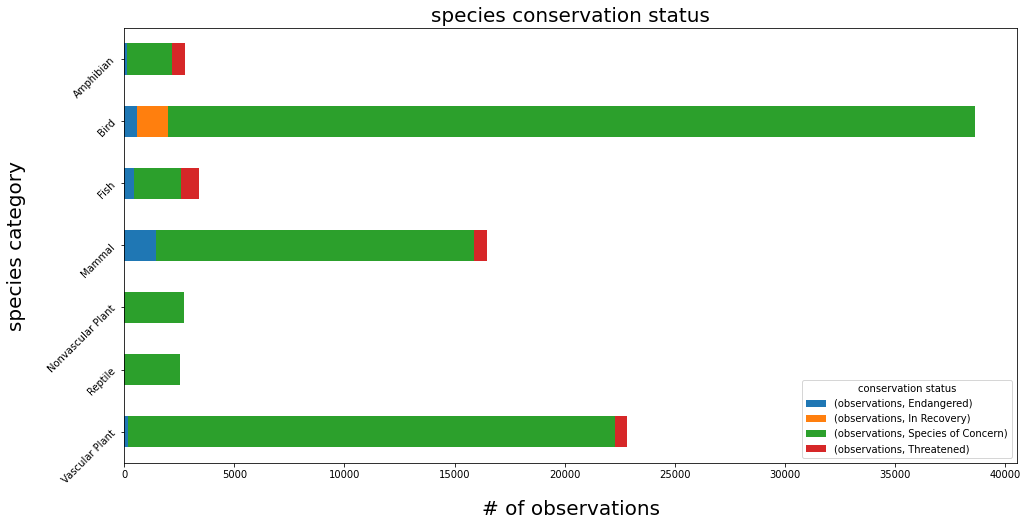

In [28]:
 ax = pivot_comb_df.plot.barh(stacked = True, \
                        figsize = [16,8], \
                        title = 'Species Conservation Status')
ax.set_xlabel('# of Observations', fontsize = 20, labelpad = 20 )
    #labelpad provides more space between xlabel and xticks
ax.set_ylabel('Species Category', fontsize = 20, labelpad = 20)
plt.yticks(rotation = 45)
ax.invert_yaxis() #plots bar graph in descending order
ax.set_title('Species Conservation Status', fontsize = 20)
ax.legend(title = 'Conservation Status', loc = 4)

We see that mammals, birds and fish have the most endangered population. Investigation will focus on these three species

# Endangered Mammals Investigation
- Determine which mammals are endangered
- Investigate which parks they are the most & least observed in

## Determine which mammals are endangered and investigate distribution

In [29]:
endangered_mam_df = comb_df[(comb_df.category == 'Mammal') & (comb_df.conservation_status == 'Endangered')]
endangered_mam_lst = np.array(endangered_mam_df.scientific_name.unique())
endangered_mam_lst

array(['Canis rufus', 'Canis lupus', 'Myotis grisescens',
       'Ovis canadensis sierrae', 'Glaucomys sabrinus coloratus',
       'Myotis sodalis'], dtype=object)

In [30]:
endangered_mam_df = endangered_mam_df.drop(['category'], axis = 1).reset_index()

In [31]:
endangered_mam_df.head()

,index,scientific_name,park_name,observations,common_names,conservation_status
0,939,Canis rufus,Bryce National Park,30,Red Wolf,Endangered
1,1294,Canis lupus,Yosemite National Park,35,Gray Wolf,Endangered
2,1766,Canis lupus,Bryce National Park,27,Gray Wolf,Endangered
3,2563,Myotis grisescens,Bryce National Park,27,Gray Myotis,Endangered
4,3855,Canis rufus,Yosemite National Park,34,Red Wolf,Endangered


In [32]:
pivot_mam_df = pd.pivot_table(endangered_mam_df, index = ['scientific_name'],\
                              columns = ['park_name'],\
                              values = ['observations'],\
                             aggfunc = np.sum)

In [33]:
pivot_mam_df

observations  \
park_name                    Bryce National Park   
scientific_name                                    
Canis lupus                                  130   
Canis rufus                                   30   
Glaucomys sabrinus coloratus                  29   
Myotis grisescens                             27   
Myotis sodalis                                27   
Ovis canadensis sierrae                       22   

                                                                  \
park_name                    Great Smoky Mountains National Park   
scientific_name                                                    
Canis lupus                                                   59   
Canis rufus                                                   13   
Glaucomys sabrinus coloratus                                  21   
Myotis grisescens                                             26   
Myotis sodalis                                                14   
Ovis canadensis sierrae                                       25   

                                                                               
park_name                    Yellowstone National Park Yosemite National Park  
scientific_name                                                                
Canis lupus                                        330                    196  
Canis rufus                                         60                     34  
Glaucomys sabrinus coloratus                        67                     36  
Myotis grisescens                                   68                     39  
Myotis sodalis                                      68                     36  
Ovis canadensis sierrae                             67                     39

In [34]:
total_end_mam = endangered_mam_df.observations.sum()
total_end_mam

1463

In [35]:
norm_pivot_mam = pivot_mam_df.apply(lambda x: x / total_end_mam)

In [36]:
norm_pivot_mam

observations  \
park_name                    Bryce National Park   
scientific_name                                    
Canis lupus                             0.088859   
Canis rufus                             0.020506   
Glaucomys sabrinus coloratus            0.019822   
Myotis grisescens                       0.018455   
Myotis sodalis                          0.018455   
Ovis canadensis sierrae                 0.015038   

                                                                  \
park_name                    Great Smoky Mountains National Park   
scientific_name                                                    
Canis lupus                                             0.040328   
Canis rufus                                             0.008886   
Glaucomys sabrinus coloratus                            0.014354   
Myotis grisescens                                       0.017772   
Myotis sodalis                                          0.009569   
Ovis canadensis sierrae                                 0.017088   

                                                                               
park_name                    Yellowstone National Park Yosemite National Park  
scientific_name                                                                
Canis lupus                                   0.225564               0.133971  
Canis rufus                                   0.041012               0.023240  
Glaucomys sabrinus coloratus                  0.045796               0.024607  
Myotis grisescens                             0.046480               0.026658  
Myotis sodalis                                0.046480               0.024607  
Ovis canadensis sierrae                       0.045796               0.026658

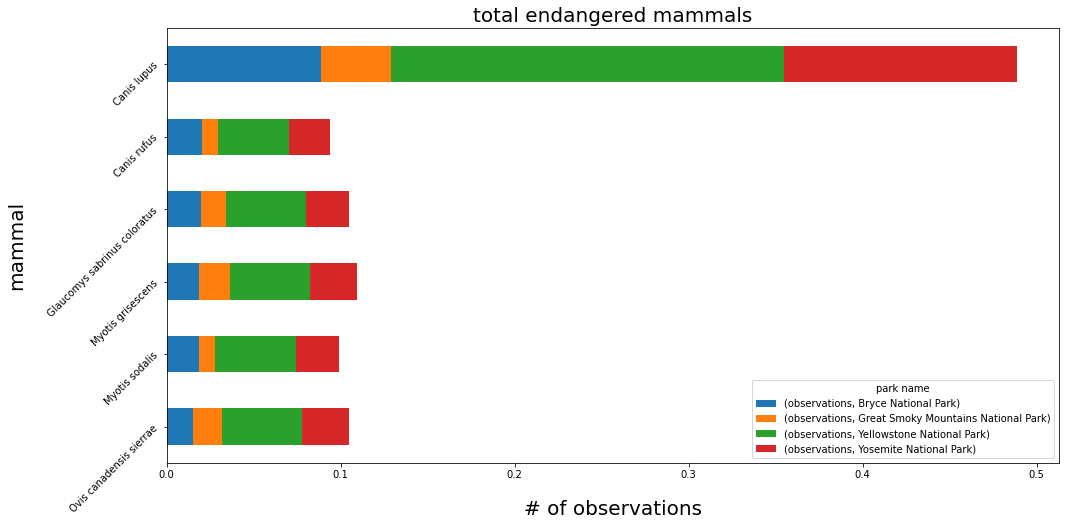

In [37]:
ax = norm_pivot_mam.plot.barh(stacked = True, \
                            figsize = [16,8], \
                           title = ' total endangered mamals')

#formatting
ax.set_xlabel('# of Observations-Normalized', fontsize = 20, labelpad = 20 )
     #label pad provides more space between xlabel and xticks
ax.invert_yaxis() #plots bar graphs in descending order
ax.set_ylabel('Mammal', fontsize = 20, labelpad = 20)
plt.yticks(rotation = 45)
ax.set_title('Total Endangered Mammals', fontsize = 20)
ax.legend(title = 'Park Name', loc = 4)

Per the above figure, the Canis Rufus appears to be the most endangered mammal due to the lowest percentage of the mamal population in each park.

# Endangered Birds Investigation

In [38]:
endang_bird_df = comb_df.query('category == "Bird" & conservation_status == "Endangered"')

In [39]:
pivot_bird_df = pd.pivot_table(endang_bird_df, index = 'scientific_name',\
                              columns = 'park_name',\
                              values = 'observations',\
                              aggfunc = np.sum)

In [40]:
pivot_bird_df

park_name,Bryce National Park,Great Smoky Mountains National Park,Yellowstone National Park,Yosemite National Park
scientific_name,,,,
Grus americana,24,13,57,37
Gymnogyps californianus,30,15,64,47
Picoides borealis,24,15,64,43
Vermivora bachmanii,20,18,58,45


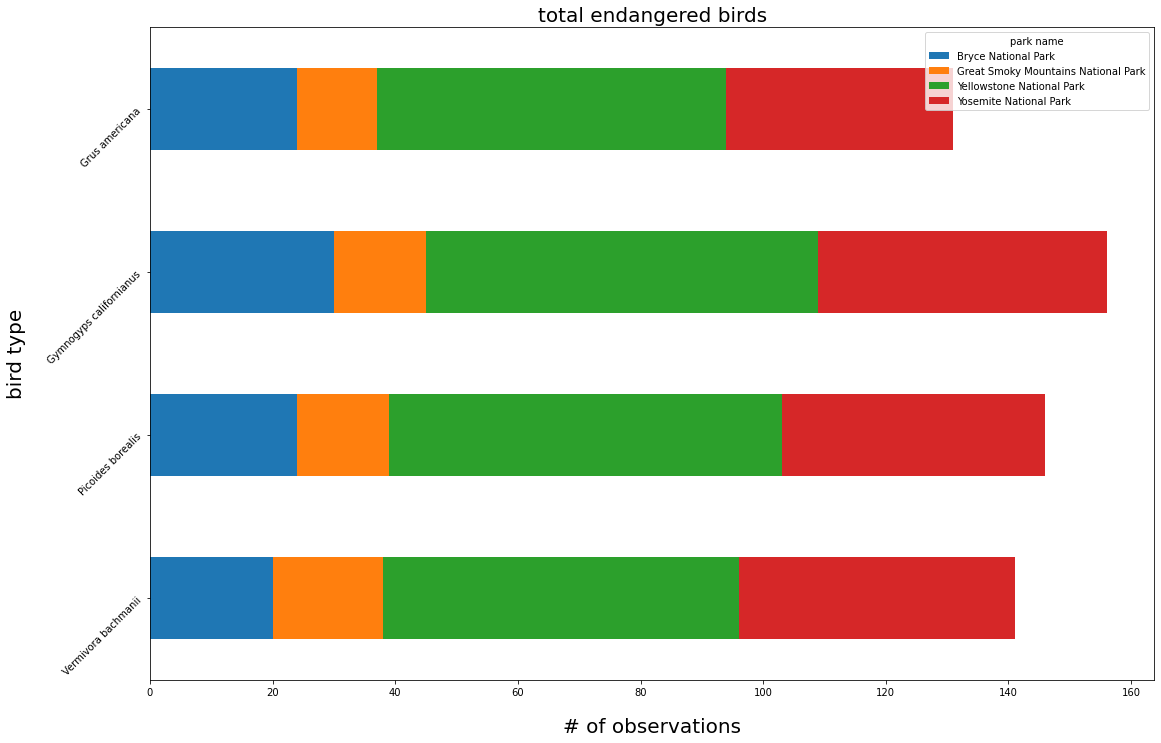

In [41]:
ax = pivot_bird_df.plot.barh(stacked = True, \
                        figsize = [18,12],\
                        )

ax.invert_yaxis() #plots bar graphs in descending order
ax.set_xlabel('# of Observations', fontsize = 20, labelpad = 20)
ax.set_ylabel('Bird Type', fontsize = 20, labelpad = 20)
ax.set_title('Total Endangered Birds', fontsize = 20)
plt.yticks(rotation = 45)
ax.legend(title = 'Park name', loc = 1)

# Endangered Fish Investigation

In [42]:
endang_fish_df = comb_df.query('category == "Fish" & conservation_status == "Endangered"')

In [43]:
pivot_fish_df = pd.pivot_table(endang_fish_df, index = 'scientific_name',\
                              columns = 'park_name',\
                              values = 'observations',\
                              aggfunc = np.sum)

In [44]:
pivot_fish_df

park_name,Bryce National Park,Great Smoky Mountains National Park,Yellowstone National Park,Yosemite National Park
scientific_name,,,,
Chasmistes liorus,23,23,65,35
Etheostoma percnurum,25,31,70,40
Noturus baileyi,22,23,67,31


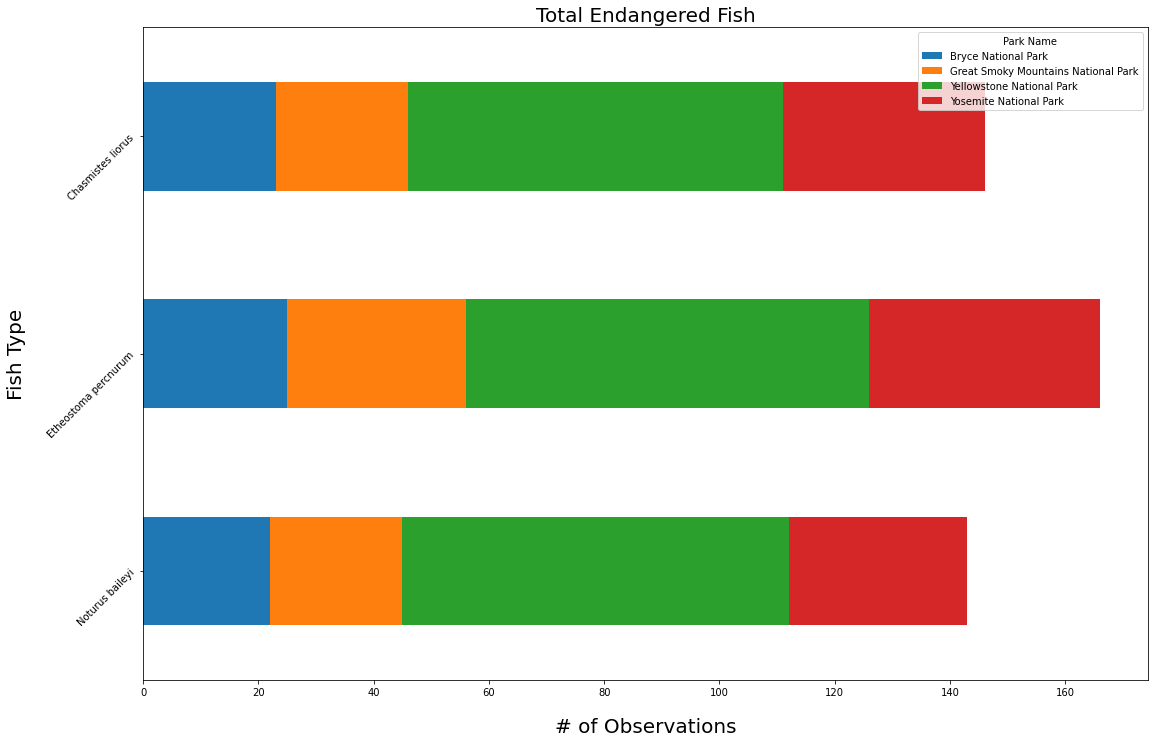

In [45]:
ax = pivot_fish_df.plot.barh(stacked = True, \
                        figsize = [18,12],\
                        )

ax.invert_yaxis() #plots bar graphs in descending order
ax.set_xlabel('# of Observations', fontsize = 20, labelpad = 20)
ax.set_ylabel('Fish Type', fontsize = 20, labelpad = 20)
ax.set_title('Total Endangered Fish', fontsize = 20)
plt.yticks(rotation = 45)
ax.legend(title = 'Park Name', loc = 1)

# Hypothesis Testing

Is there a certain type of species more likely to be endangered?

In [46]:
species_df['is_protected'] = species_df.conservation_status != 'Not_Endangered'

In [47]:
cat_count = species_df.groupby(['category','is_protected'])\
    .scientific_name.nunique()\
    .reset_index()\
    .pivot(columns = 'is_protected',
          index = 'category',
          values = 'scientific_name')\
    .reset_index()

cat_count.columns = ['category', 'not_protected', 'protected']

cat_count

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,10
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


In [48]:
cat_count['percent_protected'] = cat_count.protected / \
                                      (cat_count.protected + cat_count.not_protected) * 100

cat_count

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,10,8.000000
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


## Chi-squared test

Determine if there is a statistical difference between the conservation status rate between mammals & birds, as well as mammals & fish

In [49]:
from scipy import stats


### Testing mammals vs. birds

In [50]:
contingency_1 = [[30, 146],
               [75, 413]]

stats.chi2_contingency(contingency_1)

(0.1617014831654557,
 0.6875948096661336,
 1,
 array([[ 27.8313253, 148.1686747],
        [ 77.1686747, 410.8313253]]))

The second value returned from the chi2_contingency test represents the p-value of the statistical test. Using the standard p-value statistical significance threshold = 0.05, we see that our p-value = 0.69 is much larger than the threshold. This indicates there is not a significant statistical difference between the conservation rates of the two species.

### Testing mammals vs. fish

In [51]:
contingency_2 = [[30, 146],
               [10, 115]]

stats.chi2_contingency(contingency_2)

(4.434482041318357,
 0.03521990485242024,
 1,
 array([[ 23.38870432, 152.61129568],
        [ 16.61129568, 108.38870432]]))

With our p-value = 0.035, and being less than the target threshold, this indicates there is a significant statistical difference between the conservation rates of the two species.

# Project Conclusions

The project was able to make several data visualizations and inferences about the various species in four of the National Parks that comprised this data set.

This project was also able to answer some of the questions first posed in the beginning:


- Are certain types of species more likely to be endangered?
    - Mammals and Birds had the highest percentage of being in protection.

- Are the differences between species and their conservation status significant?
    - While mammals and birds did not have significant difference in conservation percentage, mammals and fish exhibited a statistically significant difference.


- What is the distribution of conservation status for species?

In [52]:
pivot_comb_df

observations                                          
conservation_status   Endangered In Recovery Species of Concern Threatened
category                                                                  
Amphibian                  144.0         NaN             2044.0      564.0
Bird                       574.0      1392.0            36642.0        NaN
Fish                       455.0         NaN             2109.0      832.0
Mammal                    1463.0         NaN            14408.0      578.0
Nonvascular Plant            NaN         NaN             2705.0        NaN
Reptile                      NaN         NaN             2536.0        NaN
Vascular Plant             162.0         NaN            22135.0      552.0